# Pracownia z analizy numerycznej P2 zadanie 8
Mikołaj Korobczak    31.12.2019

In [1]:
using Printf
using PyPlot
using Remez
using Random

$$t_{n+1, k} = \cos \frac{2k+1}{2n+2}$$

$$u_{n,k} = \cos \frac{k\pi}{n+1}$$

$$T_n \text{ - } n\text{-ty wielomian Czebyszewa}$$

In [2]:
function get_t(n, k)
    pom = (2k-1)/(2n)
    return cos(pom*pi)
end

function get_u(n ,k)
    return cos((k*pi)/(n+1))
end

#działamy na zbiorze [-1,1]
function get_T(k, x)
    return cos(k * acos(x))
end
;

Algorytm Clenshowa posłuży nam do obliczenia
$$ w(x) = \sum_{k=0}^n {}^{'} a_k T_k(x), $$

w liczeniu wielomianów
$$I_n(x) = \frac{2}{n+1} \sum_{i=0}^{n} {}^{'} \Big(\sum_{j=0}^n f(t_{n+1,j}) T_i(t_{n+1,j}) \Big)T_i(x),$$

$$J_n(x) = \frac{2}{n} \sum_{j=0}^n {}^{''} \Big(\sum_{k=0}^n {}^{''} f(u_{n-1, k})T_k(u_{n-1,j})\Big)T_j(x),$$

$$K_n(x) = \frac{2}{n+1} \sum_{j=0}^n {}^{'} \Big(\sum_{k=0}^{n+1} {}^{''} f(u_{n,k})T_k(u_{n,j})\Big) T_j(x)$$

In [3]:
function Chebval(n, a, x) #algorytm Clenshowa
    b2 = b1 = .0
    x2 = 2.0*x
    for i in n:-1:1
        b = a[i+1] - b2 + b1 * x2
        b2 = b1
        b1 = b
    end
    return 0.5 * a[1] - b2 + b1 * x
end

function I(n, f, x)
    #nie udało mi się znaleźć sposobu obliczenia tyko metodą Clenshowa
    a = [sum([f(get_t(n+1, j))*get_T(i, get_t(n+1, j)) for j in 1:n+1]) for i in 0:n] 
    2*Chebval(n, a, x)/(n+1)
end

function J(n, f, x)
    ak = [f(get_u(n-1, k)) for k in 0:n]
    ak[n+1] /= 2
    a = [Chebval(n, ak, get_u(n-1, j)) for j in 0:n]
    a[n+1] /= 2
    2 * Chebval(n, a, x) / n
end

function K(n, f, x)
    ak = [f(get_u(n,k)) for k in 0:n+1]
    ak[n+2] /= 2
    a = [Chebval(n+1, ak, get_u(n, j)) for j in 0:n]
    2*Chebval(n,a,x)/(n+1)
end
;

In [4]:
#kilka pomocniczych funkcji
xs = [i for i in -1:0.001:1]

function error(l1, l2)
    res = []
    for i in 1:length(l1)
        push!(res, l1[i] - l2[i])
    end
    return res
end

function fun_err(f, n)
    xss_f = [f(e) for e in xs]
    xss_I = [I(n, f, e) for e in xs]
    xss_J = [J(n, f, e) for e in xs]
    xss_K = [K(n, f, e) for e in xs]
    err_I = maximum(error(xss_f, xss_I))
    err_J = maximum(error(xss_f, xss_J))
    err_K = maximum(error(xss_f, xss_K))
    return err_I, err_J, err_K
end

function w_opt(polynomian, x) #liczy wartość wielomianu na podstawie współczynników
    res = 0
    for i in 1:length(polynomian)
        res += x^(i-1)*polynomian[i]
    end
    return res
end
;

Przykładowa funkcja 
$$f(x) = log(x+2) * cos(5x)$$

Błąd wielomianu optymalnego:	0.2110057626436592	Bład wielomianu I:	0

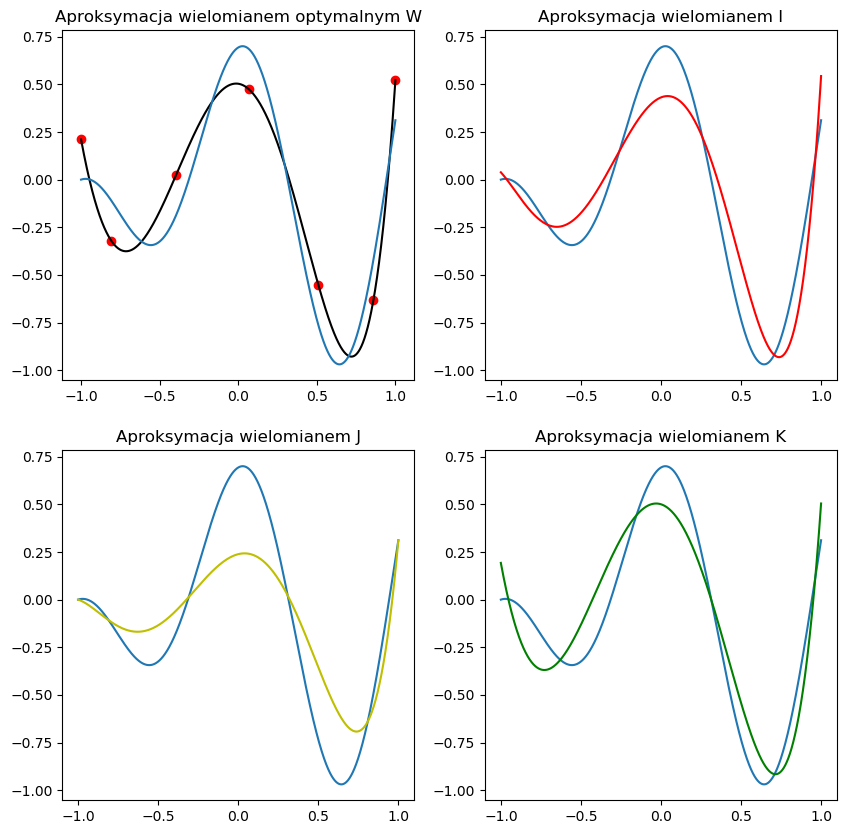

.2922601056232746
Błąd wielomianu optymalnego:	0.2110057626436592	Bład wielomianu J:	0.4578847992444967
Błąd wielomianu optymalnego:	0.2110057626436592	Bład wielomianu K:	0.2492979834127012


In [5]:
f(x) = log(x+2)*cos(5x)
xss_f = [f(e) for e in xs]
xss_I = [I(5, f, e) for e in xs]
xss_J = [J(5, f, e) for e in xs]
xss_K = [K(5, f, e) for e in xs]

h(x::BigFloat) = BigFloat(f(Float64(x)))
polynomian, _D, max_error, alternans = ratfn_minimax(h, (-1,1), 5, 0)

alterx = [Float64(e[1]) for e in alternans]
altery = [Float64(e[2] + h(e[1])) for e in alternans]
yss = [w_opt(polynomian, x) for x in xs]

@printf("Błąd wielomianu optymalnego:\t%.16f\tBład wielomianu I:\t%.16f\n", max_error, maximum(map(abs, error(xss_I, xss_f))))
@printf("Błąd wielomianu optymalnego:\t%.16f\tBład wielomianu J:\t%.16f\n", max_error, maximum(map(abs, error(xss_J, xss_f))))
@printf("Błąd wielomianu optymalnego:\t%.16f\tBład wielomianu K:\t%.16f\n", max_error, maximum(map(abs, error(xss_K, xss_f))))

figure1=figure("Position", [10, 10])

subplot(221)
plot(xs, yss, "k-", xs, xss_f)
scatter(alterx, altery, color="red")
title("Aproksymacja wielomianem optymalnym W")

subplot(222)
plot(xs, xss_f, xs, xss_I, "r-")
title("Aproksymacja wielomianem I")

subplot(223)
plot(xs, xss_f, xs, xss_J, "y-")
title("Aproksymacja wielomianem J")

subplot(224)
plot(xs, xss_f, xs, xss_K, "g-")
title("Aproksymacja wielomianem K")
show()

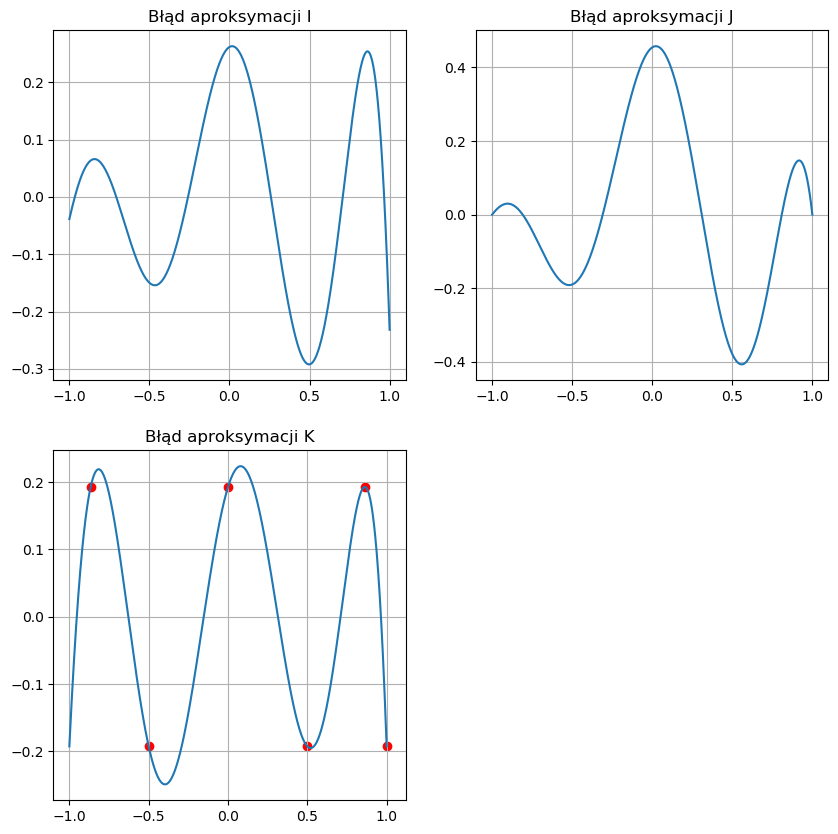

In [6]:
en_I = error(xss_f, xss_I)
en_J = error(xss_f, xss_J)
en_K = error(xss_f, xss_K)
u_n = [get_u(5, k) for k in 0:5]
fu = [- K(5, f, x) + f(x) for x in u_n]

figure1=figure("Position", [10, 10])

subplot(221)
plot(xs, en_I)
grid(true)
title("Błąd aproksymacji I")

subplot(222)
plot(xs, en_J)
grid(true)
title("Błąd aproksymacji J")

subplot(223)
plot(xs, en_K)
scatter(u_n, fu, color="red")
grid(true)
title("Błąd aproksymacji K")

show()

In [7]:
# generowanie funkcji do testów
rng = MersenneTwister(1234)

function random_poly()
    length = abs(rand(rng, Int)) % 20 + 1
    randn(rng, length)
end

function random_trig()
    length = abs(rand(rng, Int)) % 2 + 1
    res = []
    fs = ['c', 's']
    for i in 1:length
        push!(res, (randn(rng), fs[bitrand(rng, 1).+1]))
    end
    res
end

function random_log()
    [randn(rng), abs(rand(rng, Int))%100 + 3]
end

function random_pow()
    abs(randn(rng)) * (abs(rand(rng, Int)) % 10)
end

function eval_pow(p, x)
    p^x
end

function eval_log(l, x)
    l[1] * log(x + l[2])
end

function eval_poly(poly, x)
    px = 1
    res = 0
    for e in poly
        res += e * px
        px *= x
    end
    res
end

function eval_trig(trig, x)
    res = 0
    for e in trig
        if e[2] == 's'
            res += e[1] * sin(x)
        else
            res += e[1] * cos(x)
        end
    end
    res
end
;

In [8]:
# wielomiany
polynomians = []
for i in 1:200
    push!(polynomians, random_poly())
end
maximum_N = 0
error_I = []
error_J = []
error_K = []
@time begin
    for N in 2:100
        error_IN = []
        error_JN = []
        error_KN = []
        for e in polynomians
            errors = fun_err(x->eval_poly(e, x), N)
            push!(error_IN, errors[1])
            push!(error_JN, errors[2])
            push!(error_KN, errors[3])
        end
        push!(error_I, maximum(error_IN))
        push!(error_J, maximum(error_JN))
        push!(error_K, maximum(error_KN))
        if length(error_I) < 2
            continue
        end
        if abs(error_I[length(error_I)] - error_I[length(error_I) - 1]) < 0.001 && abs(error_J[length(error_J)] - error_J[length(error_J) - 1]) < 0.001 && abs(error_K[length(error_K)] - error_K[length(error_K) - 1]) < 0.001
            println(N)
            maximum_N = N
            break
        end
        maximum_N = 100
    end
end

16
124.541456 seconds (415.42 M allocations: 23.035 GiB, 4.08% gc time)


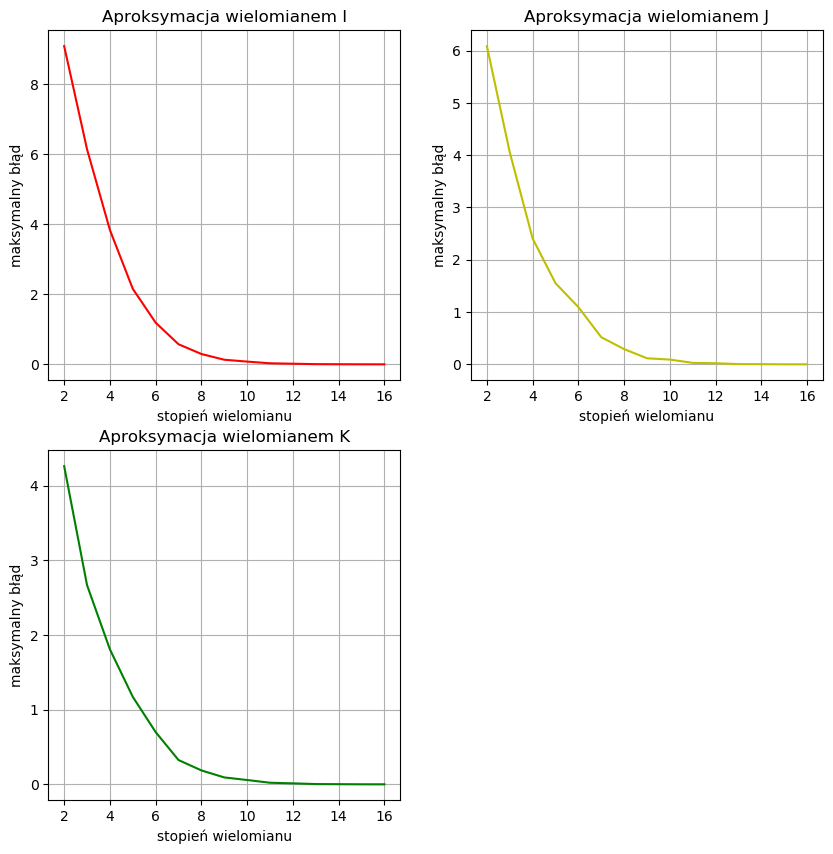

Any[9.09470889547174, 6.146546328422126, 3.838987786343548, 2.158077902006827, 1.190196242277171, 0.5736839523713719, 0.2952196344934439, 0.13090365587539887, 0.07768772614006325, 0.029606876862003473, 0.01681553036652028, 0.005085839980122353, 0.002569577736340367, 0.0005488850433557069, 0.0002445488783693328]

Any[6.086535073177334, 4.054888821423148, 2.405824521868837, 1.5514347352245919, 1.0941371800578308, 0.5186421615812478, 0.2911184495608139, 0.11540929087899299, 0.09091710328525937, 0.027903495230102715, 0.021038322205019, 0.0049050912278388314, 0.003658220166214421, 0.0006027185554517978, 0.00041007102346701796]

Any[4.260131317787276, 2.666857807918398, 1.806873617378935, 1.1710951429804537, 0.6991262352644192, 0.3248931548486502, 0.1862214704820625, 0.09231483997230372, 0.05779338404527867, 0.02114690706301059, 0.012932251709143916, 0.0036581126343906423, 0.002097588266127909, 0.0004114806658277459, 0.00021808209411522395]



In [9]:
figure1=figure("Position", [10, 10])
xs_err = [e for e in 2:length(error_I)+1]
subplot(221)
plot(xs_err, error_I, "r-")
title("Aproksymacja wielomianem I")
xlabel("stopień wielomianu")
ylabel("maksymalny błąd")
grid(true)

subplot(222)
plot(xs_err, error_J, "y-")
title("Aproksymacja wielomianem J")
xlabel("stopień wielomianu")
ylabel("maksymalny błąd")
grid(true)

subplot(223)
plot(xs_err, error_K, "g-")
title("Aproksymacja wielomianem K")
xlabel("stopień wielomianu")
ylabel("maksymalny błąd")
grid(true)

show()

println(error_I, '\n')
println(error_J, '\n')
println(error_K, '\n')

In [10]:
# funkcje trygonometryczne +/* wielomiany
functions = []
for i in 1:50
    push!(functions, [random_trig(), random_poly(), +])
    push!(functions, [random_trig(), random_poly(), *])
end

error_I = []
error_J = []
error_K = []
@time begin
    for N in 2:10
        error_IN = []
        error_JN = []
        error_KN = []
        for e in functions
            errors = fun_err(x->e[3](eval_poly(e[2], x), eval_trig(e[1], x)), N)
            push!(error_IN, errors[1])
            push!(error_JN, errors[2])
            push!(error_KN, errors[3])
        end
        push!(error_I, maximum(error_IN))
        push!(error_J, maximum(error_JN))
        push!(error_K, maximum(error_KN))
        maximum_N = 10
    end
end

236.061059 seconds (1.72 G allocations: 29.398 GiB, 3.21% gc time)


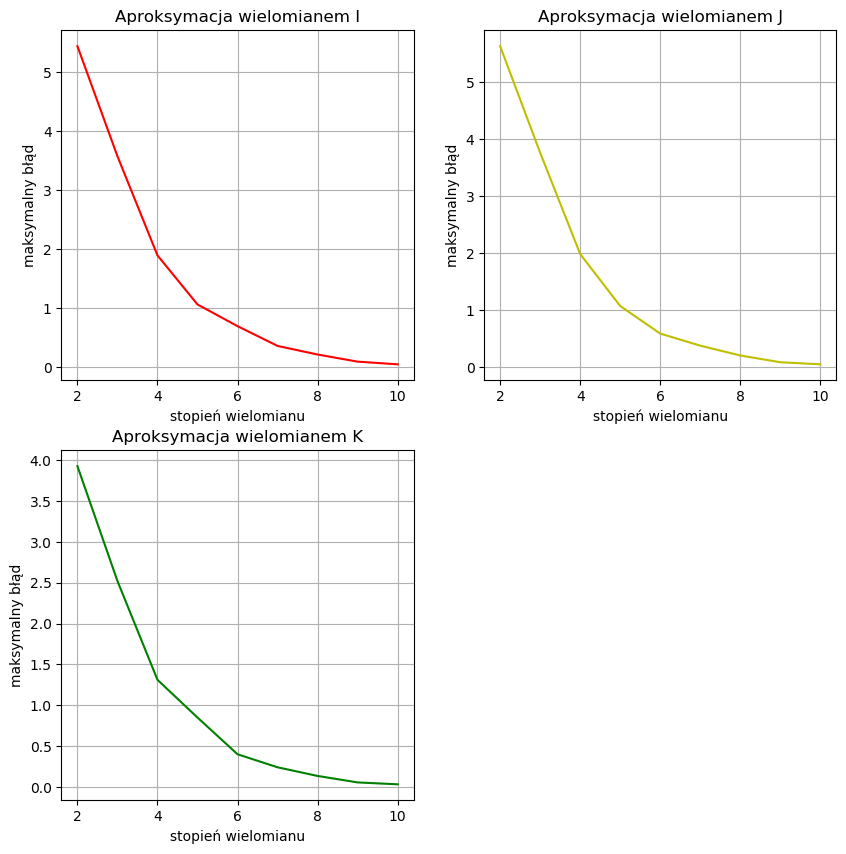

Any[5.439457360166754, 3.5744720684554423, 1.8947240638891962, 1.064000733296143, 0.6961910890551009, 0.3614090315794485, 0.21568417430129472, 0.09519071136458823, 0.049966780388291276]

Any[5.634086795723495, 3.7640262368307735, 1.986984841092477, 1.0753530359494583, 0.5920908188724718, 0.3802770072940974, 0.208133817075421, 0.0897234024783028, 0.053371625079909224]

Any[3.928459982068813, 2.5217423308741296, 1.3121546074863746, 0.8500325164487093, 0.40058880260863583, 0.24096514536069957, 0.1352130762900704, 0.0558206556606296, 0.03269956900172799]



In [11]:
figure1=figure("Position", [10, 10])
xs_err = [e for e in 2:length(error_I)+1]
subplot(221)
plot(xs_err, error_I, "r-")
title("Aproksymacja wielomianem I")
xlabel("stopień wielomianu")
ylabel("maksymalny błąd")
grid(true)

subplot(222)
plot(xs_err, error_J, "y-")
title("Aproksymacja wielomianem J")
xlabel("stopień wielomianu")
ylabel("maksymalny błąd")
grid(true)

subplot(223)
plot(xs_err, error_K, "g-")
title("Aproksymacja wielomianem K")
xlabel("stopień wielomianu")
ylabel("maksymalny błąd")
grid(true)

show()

println(error_I, '\n')
println(error_J, '\n')
println(error_K, '\n')

In [12]:
# kilka mieszanych funkcji
functions = []
for i in 1:50
    push!(functions, ['a', random_poly(), random_log(), random_trig()])
    push!(functions, ['b', random_poly(), random_trig(), random_log()])
    push!(functions, ['c', random_trig(), random_log(), random_poly()])
end

function eval_function(e)
    if e[1] == 'a'
        return x-> eval_poly(e[2], x) * eval_log(e[3], x) + eval_trig(e[4], x)
    elseif e[1] == 'b'
        return x-> eval_poly(e[2], x) * eval_trig(e[3], x) + eval_log(e[4], x)
    else
        return x-> eval_trig(e[2], x) * eval_log(e[3], x) + eval_poly(e[4], x)
    end
end

maximum_N = 0
error_I = []
error_J = []
error_K = []
@time begin
    for N in 2:10
        error_IN = []
        error_JN = []
        error_KN = []
        for e in functions
            errors = fun_err(eval_function(e), N)
            push!(error_IN, errors[1])
            push!(error_JN, errors[2])
            push!(error_KN, errors[3])
        end
        push!(error_I, maximum(error_IN))
        push!(error_J, maximum(error_JN))
        push!(error_K, maximum(error_KN))
        maximum_N = 10
    end
end

331.228846 seconds (3.07 G allocations: 51.360 GiB, 3.82% gc time)


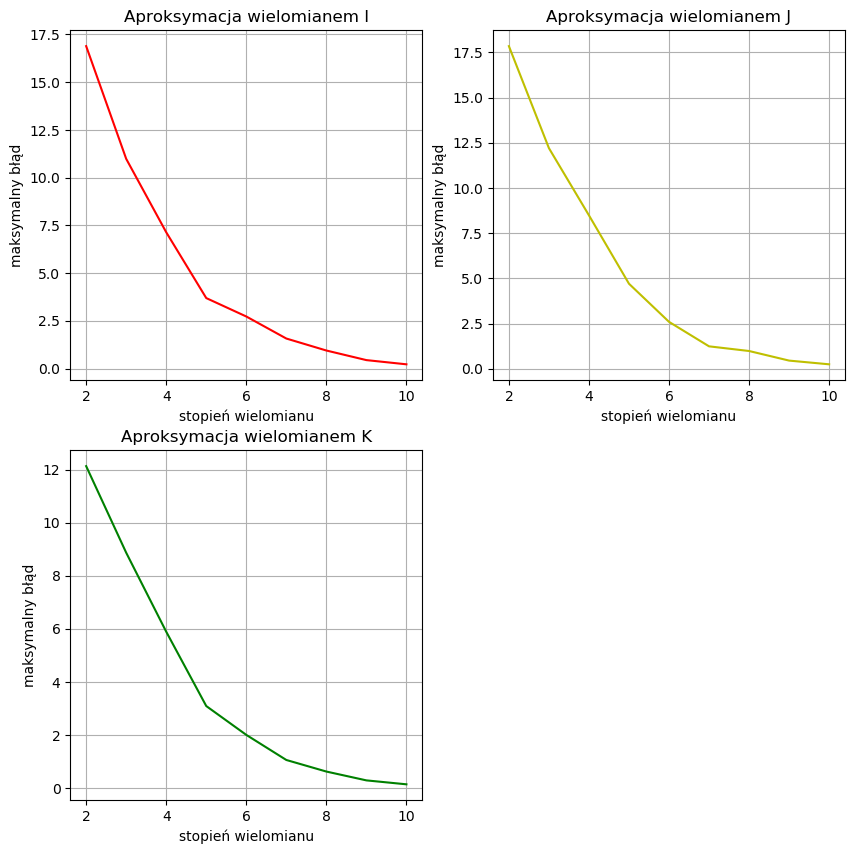

Any[16.887726050795298, 10.985274647899782, 7.1397990005202665, 3.693482425605393, 2.7294414349716836, 1.575239897418789, 0.9477033316071575, 0.44513536185799296, 0.2251316858911867]

Any[17.84506098512982, 12.20355279058988, 8.487851715430999, 4.7056190640951625, 2.5980099665321346, 1.2439256321029615, 0.9857791692833181, 0.4553209106045708, 0.2500622097725944]

Any[12.129631070642636, 8.868504955381361, 5.8927877763437095, 3.0933794147749367, 2.007202534605173, 1.06189705670189, 0.6260835093143893, 0.2934389362202584, 0.1453603604288327]



In [13]:
figure1=figure("Position", [10, 10])
xs_err = [e for e in 2:length(error_I)+1]
subplot(221)
plot(xs_err, error_I, "r-")
title("Aproksymacja wielomianem I")
xlabel("stopień wielomianu")
ylabel("maksymalny błąd")
grid(true)

subplot(222)
plot(xs_err, error_J, "y-")
title("Aproksymacja wielomianem J")
xlabel("stopień wielomianu")
ylabel("maksymalny błąd")
grid(true)

subplot(223)
plot(xs_err, error_K, "g-")
title("Aproksymacja wielomianem K")
xlabel("stopień wielomianu")
ylabel("maksymalny błąd")
grid(true)

show()

println(error_I, '\n')
println(error_J, '\n')
println(error_K, '\n')